<h2>First, lets import the main libraries and the dataset</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('breast_cancer.csv')
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


<h2>Lets check some information about the data like if there is null or zero values</h2>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample code number,683.0,1.076720e+06,620644.047655,63375.0,877617.0,1171795.0,1238705.0,13454352.0
Clump Thickness,683.0,4.442167e+00,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805e+00,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227e+00,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161e+00,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261e+00,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095e+00,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693e+00,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221e+00,1.732674,1.0,1.0,1.0,1.0,10.0


<h2>Now, for the EDA</h2>

<h2>It is important to check the correlation to see which features affect the most on the target</h2>

<Axes: >

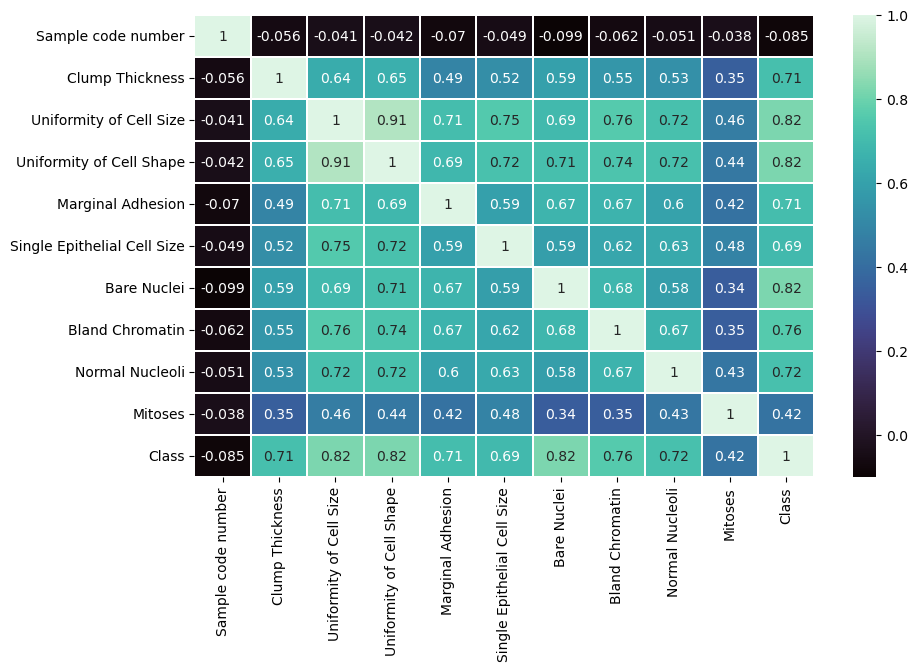

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='mako',linewidths=0.2)

<h2>We can see that Uniformity of Cell Size & Shape, and Bare Nucleoli affect the most</h2>

<h2>I want to check the numbers of people with brest cancer vs without</h2>

<Axes: xlabel='Class', ylabel='count'>

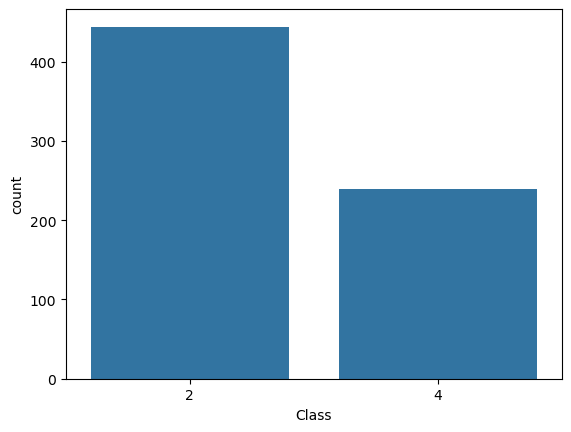

In [19]:
sns.barplot(df['Class'].value_counts())

<h2>We can see clearly that people with class 2 (Without cancer) are more</h2>

<h2>I want to check the numbers and box plot between the most effected features and the target</h2>

<Axes: xlabel='Class', ylabel='Uniformity of Cell Size'>

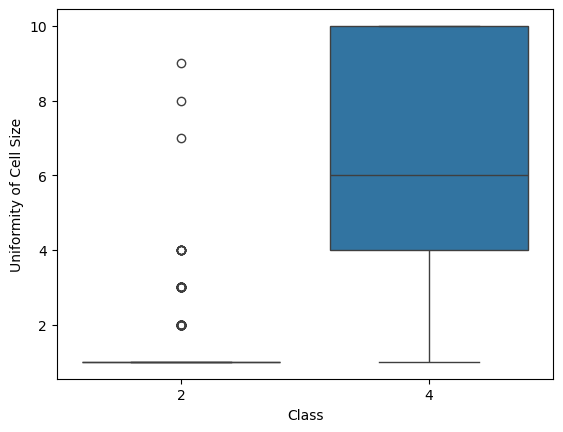

In [21]:
sns.boxplot(data=df,x='Class',y='Uniformity of Cell Size')

<Axes: xlabel='Class', ylabel='Uniformity of Cell Shape'>

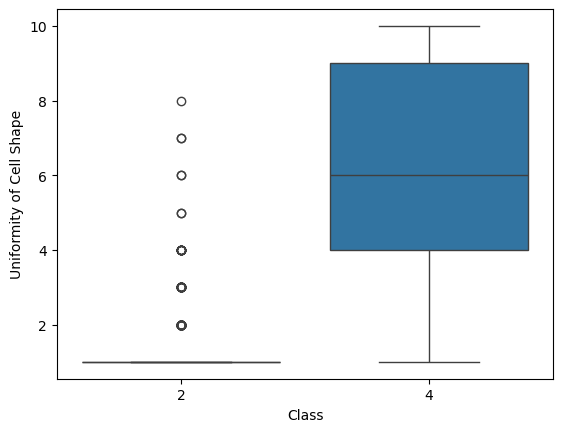

In [23]:
sns.boxplot(data=df,x='Class',y='Uniformity of Cell Shape')

<Axes: xlabel='Class', ylabel='Bare Nuclei'>

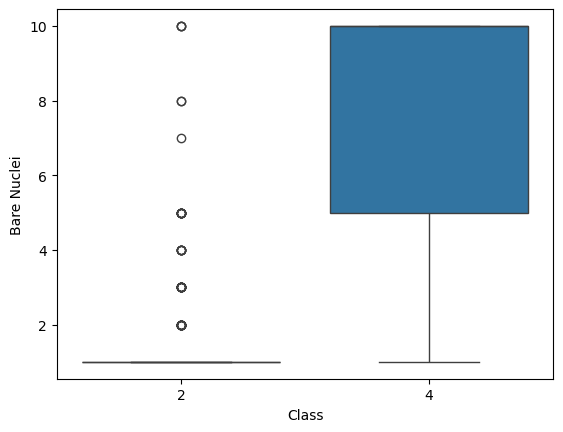

In [25]:
sns.boxplot(data=df,x='Class',y='Bare Nuclei')

<h2>We can see that people with high Uniformity of Cell Size & Shape, and Bare Nucleoli have brest cancer</h2>

<h2>Now it is time to prepare the data for the model</h2>

In [27]:
X = df.drop('Class',axis=1)
y = df['Class']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

<h2>Im going to use Logistic Regression with Cross Validation since this is a categorical data, and I want the best parameters which CV will choose automatically</h2>

In [33]:
from sklearn.linear_model import LogisticRegressionCV
logistic_model = LogisticRegressionCV(random_state=0,max_iter=5000)
logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



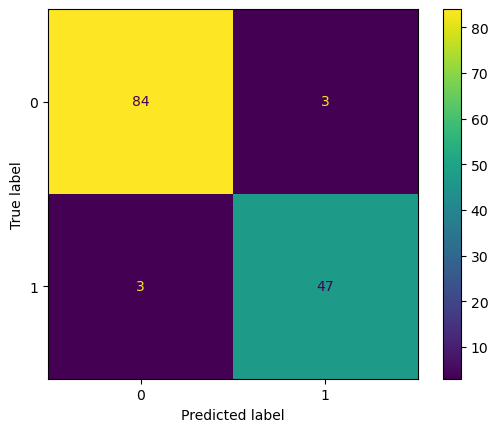

In [39]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<h2>We can see that the model performed so well with accuracy of 96%, and only 6 False predictions (3 Positive, 3 Negative) from 137</h2>

<h2>Last thing, I made a patient variable, just assign the values and it will give you the prediction with the probability</h2>

In [63]:
patient = [[1000024,2,2,4,4,3,3,1,1,2]]
print(f'Class: {logistic_model.predict(patient)}')
print(f'Probability: {logistic_model.predict_proba(patient)}')

Class: [2]
Probability: [[0.94310632 0.05689368]]


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
